In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import random

random.seed(0)
np.random.seed(0)

In [127]:
data = pd.read_csv('data.txt',header=None,names=['x','y'],delim_whitespace=True)

In [128]:
data.head()

,x,y
0,-6.0,-164.160590
1,-5.8,90.739607
2,-5.6,-131.842090
3,-5.4,-178.428200
4,-5.2,-4.838565


<AxesSubplot:xlabel='x', ylabel='y'>

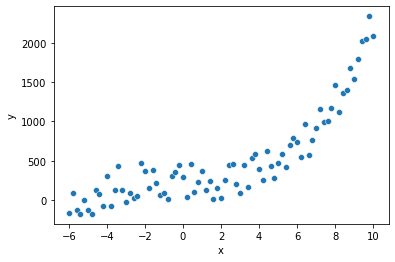

In [129]:
sns.scatterplot(x='x',y='y',data=data)

In [130]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       81 non-null     float64
 1   y       81 non-null     float64
dtypes: float64(2)
memory usage: 1.4 KB


In [131]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [132]:
trainX=[]
trainY=[]
testX=[]
testY=[]
for i in range(10):
    data_shuffled = shuffle(data)
    X_train, X_test, y_train, y_test = train_test_split(data['x'], data['y'], test_size=0.2)
    trainX.append(X_train)
    trainY.append(y_train)
    testX.append(X_test)
    testY.append(y_test)

In [133]:
from sklearn.preprocessing import StandardScaler

In [134]:
stdTrainX=[]
stdTestX=[]
scaler = StandardScaler()
for i in range(10):
    stdTrainX.append(scaler.fit_transform(trainX[i].values.reshape(-1,1)))
    stdTestX.append(scaler.transform(testX[i].values.reshape(-1,1)))

In [135]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [136]:
from sklearn.metrics import r2_score

In [137]:
###3 a.

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
models=[] ## to store all the models to use later for predicting test and traing error.

In [138]:
linearModel =[]
for i in range(10):
    linModel = LinearRegression()
    linModel.fit(stdTrainX[i],trainY[i])
    pred = linModel.predict(stdTestX[i])
    print("r2_score : ",r2_score(testY[i],pred))
    print("weights : ",linModel.coef_)
    print("w0 : ",linModel.intercept_)
    linearModel.append(linModel)
    print("**************\n")

r2_score :  0.6373445703249412
weights :  [489.65081065]
w0 :  531.7846146875
**************

r2_score :  0.6819247909035824
weights :  [472.46126714]
w0 :  476.39260241249997
**************

r2_score :  0.7108555595251678
weights :  [491.33838697]
w0 :  551.3631129124999
**************

r2_score :  0.36941124452060214
weights :  [517.33049645]
w0 :  557.103098771875
**************

r2_score :  0.527473129694831
weights :  [513.40496738]
w0 :  519.8270516
**************

r2_score :  0.645683941764224
weights :  [491.83285465]
w0 :  533.681856271875
**************

r2_score :  0.6500306856391823
weights :  [500.88947089]
w0 :  504.024349646875
**************

r2_score :  -0.8305982206799376
weights :  [526.40651094]
w0 :  587.74407378125
**************

r2_score :  0.7244052193019885
weights :  [468.9683163]
w0 :  510.0815989125
**************

r2_score :  0.6731129053454532
weights :  [490.55288412]
w0 :  476.31054159999997
**************



In [139]:
models.append(linearModel)

In [140]:
#### 3. b.
deg3Models=[]
poly = PolynomialFeatures(degree=3)
for i in range(10):
    X_Poly = poly.fit_transform(stdTrainX[i])
    X_Poly_test = poly.transform(stdTestX[i])
    poly.fit(X_Poly,trainY[i])
    polyModel = LinearRegression()
    polyModel.fit(X_Poly,trainY[i])
    pred = polyModel.predict(X_Poly_test)
    print("r2_score : ",r2_score(testY[i],pred))
    print("weights : ",polyModel.coef_)
    print("w0 ",polyModel.intercept_)
    print("*******************\n")
    deg3Models.append(polyModel)

r2_score :  0.9184446620445713
weights :  [  0.         161.02441199 279.4727397  191.66106121]
w0  262.83429745063546
*******************

r2_score :  0.9381432707491951
weights :  [  0.          99.93026533 208.55430808 197.19549156]
w0  255.52007895705967
*******************

r2_score :  0.888855587323664
weights :  [  0.         170.35457926 331.32930175 207.98305846]
w0  257.6367692098222
*******************

r2_score :  0.8164090117807347
weights :  [  0.         190.01146926 291.98395515 180.38876958]
w0  263.55374648837375
*******************

r2_score :  0.8898041688948293
weights :  [  0.         144.11040453 267.4838093  196.91694268]
w0  236.17486422989674
*******************

r2_score :  0.9467539513613242
weights :  [  0.         137.32174672 279.0549102  209.65681276]
w0  265.0168453145811
*******************

r2_score :  0.8978241114693424
weights :  [  0.         109.99910291 276.38985999 223.86034545]
w0  216.4630648921497
*******************

r2_score :  0.6572027204

In [141]:
models.append(deg3Models)

In [142]:
#### 3. c.
deg5Models=[]
poly = PolynomialFeatures(degree=5)
for i in range(10):
    X_Poly = poly.fit_transform(stdTrainX[i])
    X_Poly_test = poly.transform(stdTestX[i])
    poly.fit(X_Poly,trainY[i])
    polyModel = LinearRegression()
    polyModel.fit(X_Poly,trainY[i])
    pred = polyModel.predict(X_Poly_test)
    print("r2_score : ",r2_score(testY[i],pred))
    print("weights : ",polyModel.coef_)
    print("w0 ",polyModel.intercept_)
    print("*******************\n")
    deg5Models.append(polyModel)

r2_score :  0.9107472268274964
weights :  [  0.          92.84239506 276.07190943 293.70376989  -0.73569616
 -30.03846698]
w0  266.09988716535497
*******************

r2_score :  0.9338036673317607
weights :  [  0.          52.7697732  149.57084138 275.34245998  25.77379123
 -25.19994916]
w0  271.1096329381467
*******************

r2_score :  0.8892067303654759
weights :  [  0.         196.48109359 294.69972161 164.66521462  16.41517345
  14.55772277]
w0  266.5170791946927
*******************

r2_score :  0.8127123877583399
weights :  [  0.         175.34897319 229.64503515 205.12147435  23.85181365
  -7.24164688]
w0  282.37141497342685
*******************

r2_score :  0.8918174198652672
weights :  [  0.         159.03905181 232.28439754 173.9962613   14.06548836
   6.76094814]
w0  246.66855085595665
*******************

r2_score :  0.9211675946097092
weights :  [  0.         215.74533304 154.21142309  78.22636351  52.45640623
  43.26465827]
w0  299.2925346868469
*******************

r

In [143]:
models.append(deg5Models)

In [104]:
### 3. d.
# deg50Models=[]
# poly = PolynomialFeatures(degree=50)
# for i in range(10):
#     X_Poly = poly.fit_transform(stdTrainX[i])
#     X_Poly_test = poly.transform(stdTestX[i])
#     poly.fit(X_Poly,trainY[i])
#     polyModel = LinearRegression()
#     polyModel.fit(X_Poly,trainY[i])
#     pred = polyModel.predict(X_Poly_test)
#     print(r2_score(testY[i],pred))
#     print(polyModel.coef_)
#     print(polyModel.intercept_)
#     deg50Models.append(polyModel)
# models.append(deg50Models)
        

mean train error :  244.54022187507636
std train error :  60.38727845322268
***************
mean train error :  235.68831307425964
std train error :  63.481653300409704
***************
mean train error :  262.00575854706
std train error :  63.07466062567381
***************
mean train error :  252.8636909891155
std train error :  60.71046328057839
***************
mean train error :  249.58115971785202
std train error :  61.06761102830419
***************
mean train error :  243.16720021136462
std train error :  63.22288156417243
***************
mean train error :  246.60757316794454
std train error :  65.07601127034863
***************
mean train error :  258.10913158355885
std train error :  63.44976578692924
***************
mean train error :  236.6002685962914
std train error :  65.48224200519714
***************
mean train error :  247.62935739010587
std train error :  64.41494695868052
***************


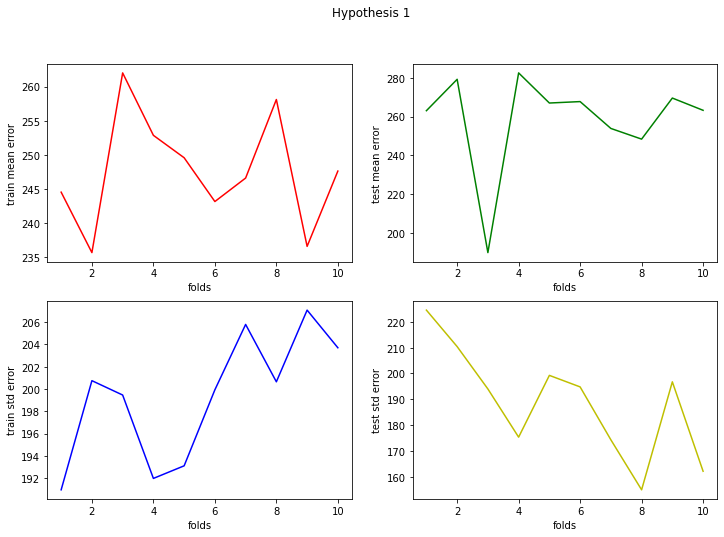

min training error  235.68831307425964  at index 2


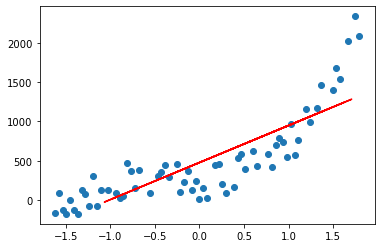

In [148]:
### 4.a (linear regression)
plt.figure(figsize=(12,8))
train_mean_err_list=[]
test_mean_err_list=[]
train_std_err_list=[]
test_std_err_list=[]
for i in range(10):
    predTrain = models[0][i].predict(stdTrainX[i])
    predTest = models[0][i].predict(stdTestX[i])
    train_err = abs(predTrain-trainY[i])
    test_err = abs(predTest-testY[i])
    train_mean_err_list.append(np.mean(train_err))
    test_mean_err_list.append(np.mean(test_err))
    train_std_err_list.append(np.std(train_err))
    test_std_err_list.append(np.std(test_err))
    print("mean train error : ",np.mean(train_err))
    print("std train error : ",np.std(train_err)/np.sqrt(10))
#     print("mean test error : ",np.mean(test_err))
#     print("std test error : ",np.std(test_err)/np.sqrt(10))
    print("***************")
ind=[1,2,3,4,5,6,7,8,9,10]
plt.subplot(2,2,1)
plt.plot(ind,train_mean_err_list,'r')
plt.xlabel('folds')
plt.ylabel('train mean error')
plt.subplot(2,2,3)
plt.plot(ind,train_std_err_list,'b')
plt.xlabel('folds')
plt.ylabel('train std error')
plt.subplot(2,2,2)
plt.plot(ind,test_mean_err_list,'g')
plt.xlabel('folds')
plt.ylabel('test mean error')
plt.subplot(2,2,4)
plt.plot(ind,test_std_err_list,'y')
plt.xlabel('folds')
plt.ylabel('test std error')
plt.suptitle('Hypothesis 1')
plt.show()


#### 4.b)
#### minimum mean training error right????
min_val = min(train_mean_err_list)
min_ind = train_mean_err_list.index(min_val)
print("min training error ",min_val," at index",min_ind+1)
plt.scatter(stdTrainX[min_ind],trainY[min_ind])
pred = models[0][min_ind].predict(stdTestX[min_ind])
plt.plot(stdTestX[min_ind],pred,'r')

mean train error :  122.77546843593444
std train error :  23.463944666699234
***************
mean train error :  128.6005212736208
std train error :  22.706730440722406
***************
mean train error :  119.83805864635853
std train error :  24.43900252385136
***************
mean train error :  120.82202661357329
std train error :  22.0337171166772
***************
mean train error :  123.09901629683583
std train error :  23.981209126307906
***************
mean train error :  131.90052095146382
std train error :  24.606116861519116
***************
mean train error :  123.19417974571193
std train error :  23.582209591355447
***************
mean train error :  134.56558574545454
std train error :  23.099782608831937
***************
mean train error :  132.29754964776285
std train error :  22.9006672266926
***************
mean train error :  130.70930061746185
std train error :  23.854583388760542
***************


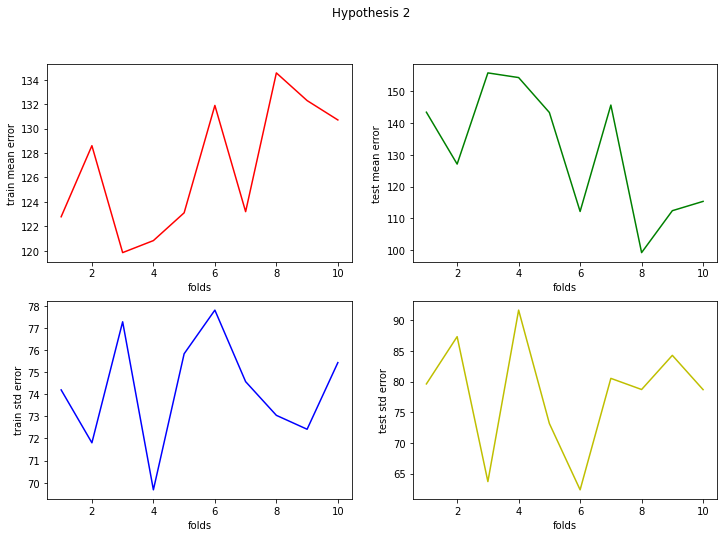

min training error  119.83805864635853  at index 3


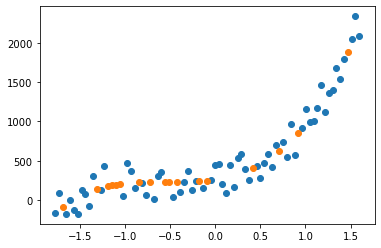

In [161]:
### 4.a (polynomial regression -degree 3)
plt.figure(figsize=(12,8))
train_mean_err_list=[]
test_mean_err_list=[]
train_std_err_list=[]
test_std_err_list=[]
poly = PolynomialFeatures(degree=3)
for i in range(10):
    X_Poly = poly.fit_transform(stdTrainX[i])
    X_Poly_test = poly.transform(stdTestX[i])
    predTrain = models[1][i].predict(X_Poly)
    predTest = models[1][i].predict(X_Poly_test)
    train_err = abs(predTrain-trainY[i])
    test_err = abs(predTest-testY[i])
    train_mean_err_list.append(np.mean(train_err))
    test_mean_err_list.append(np.mean(test_err))
    train_std_err_list.append(np.std(train_err))
    test_std_err_list.append(np.std(test_err))
    print("mean train error : ",np.mean(train_err))
    print("std train error : ",np.std(train_err)/np.sqrt(10))
#     print("mean test error : ",np.mean(test_err))
#     print("std test error : ",np.std(test_err)/np.sqrt(10))
    print("***************")
ind=[1,2,3,4,5,6,7,8,9,10]
plt.subplot(2,2,1)
plt.plot(ind,train_mean_err_list,'r')
plt.xlabel('folds')
plt.ylabel('train mean error')
plt.subplot(2,2,3)
plt.plot(ind,train_std_err_list,'b')
plt.xlabel('folds')
plt.ylabel('train std error')
plt.subplot(2,2,2)
plt.plot(ind,test_mean_err_list,'g')
plt.xlabel('folds')
plt.ylabel('test mean error')
plt.subplot(2,2,4)
plt.plot(ind,test_std_err_list,'y')
plt.xlabel('folds')
plt.ylabel('test std error')
plt.suptitle('Hypothesis 2')
plt.show()

min_val = min(train_mean_err_list)
min_ind = train_mean_err_list.index(min_val)
print("min training error ",min_val," at index",min_ind+1)
plt.scatter(stdTrainX[min_ind],trainY[min_ind])
X_Poly = poly.fit_transform(stdTrainX[min_ind])
X_Poly_test = poly.transform(stdTestX[min_ind])
pred = models[1][min_ind].predict(X_Poly_test)
plt.scatter(stdTestX[min_ind],pred)

mean train error :  122.80480650455209
std train error :  22.755009959054135
***************
mean train error :  128.20746432749087
std train error :  22.144786050297853
***************
mean train error :  119.22112719421489
std train error :  24.492306674987468
***************
mean train error :  119.33669375402198
std train error :  22.21136751457766
***************
mean train error :  122.16476564898305
std train error :  24.240432052270986
***************
mean train error :  126.84871572633753
std train error :  24.625004986253902
***************
mean train error :  121.66403137812688
std train error :  23.86129499843575
***************
mean train error :  131.98434102382836
std train error :  23.659884518735947
***************
mean train error :  129.47349779516176
std train error :  23.20141294986115
***************
mean train error :  128.6450360558306
std train error :  23.96150170667967
***************


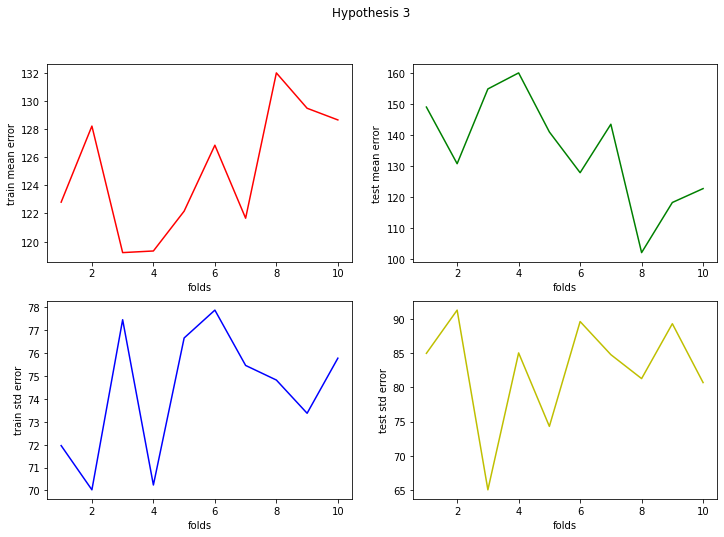

min training error  119.22112719421489  at index 3


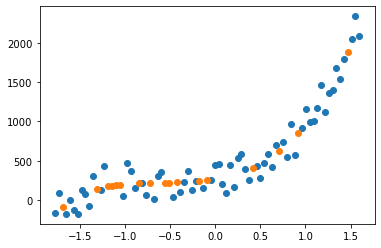

In [162]:
### 4.a (polynomial regression) degree 5
plt.figure(figsize=(12,8))
train_mean_err_list=[]
test_mean_err_list=[]
train_std_err_list=[]
test_std_err_list=[]
poly = PolynomialFeatures(degree=5)
for i in range(10):
    X_Poly = poly.fit_transform(stdTrainX[i])
    X_Poly_test = poly.transform(stdTestX[i])
    predTrain = models[2][i].predict(X_Poly)
    predTest = models[2][i].predict(X_Poly_test)
    train_err = abs(predTrain-trainY[i])
    test_err = abs(predTest-testY[i])
    train_mean_err_list.append(np.mean(train_err))
    test_mean_err_list.append(np.mean(test_err))
    train_std_err_list.append(np.std(train_err))
    test_std_err_list.append(np.std(test_err))
    print("mean train error : ",np.mean(train_err))
    print("std train error : ",np.std(train_err)/np.sqrt(10))
#     print("mean test error : ",np.mean(test_err))
#     print("std test error : ",np.std(test_err)/np.sqrt(10))
    print("***************")
ind=[1,2,3,4,5,6,7,8,9,10]
plt.subplot(2,2,1)
plt.plot(ind,train_mean_err_list,'r')
plt.xlabel('folds')
plt.ylabel('train mean error')
plt.subplot(2,2,3)
plt.plot(ind,train_std_err_list,'b')
plt.xlabel('folds')
plt.ylabel('train std error')
plt.subplot(2,2,2)
plt.plot(ind,test_mean_err_list,'g')
plt.xlabel('folds')
plt.ylabel('test mean error')
plt.subplot(2,2,4)
plt.plot(ind,test_std_err_list,'y')
plt.xlabel('folds')
plt.ylabel('test std error')
plt.suptitle('Hypothesis 3')
plt.show()


min_val = min(train_mean_err_list)
min_ind = train_mean_err_list.index(min_val)
print("min training error ",min_val," at index",min_ind+1)
plt.scatter(stdTrainX[min_ind],trainY[min_ind])
X_Poly = poly.fit_transform(stdTrainX[min_ind])
X_Poly_test = poly.transform(stdTestX[min_ind])
pred = models[2][min_ind].predict(X_Poly_test)
plt.scatter(stdTestX[min_ind],pred)

In [124]:
len(models)

3